In [1]:
import numpy as np
from gwbench import network

/home/sreelakshmi.m/softwares/anaconda3/envs/igwn-py310/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/sreelakshmi.m/softwares/anaconda3/envs/igwn-py310/lib/python3.10/site-packages/pyRing/utils.py:60: UserWarning: * The `surfinBH` package is not automatically installed due to possible conflicts. If you wish to use its functionalities, it needs to be installed separately.
  warnings.warn("* The `surfinBH` package is not automatically installed due to possible conflicts. If you wish to use its functionalities, it needs to be installed separately.")


In [2]:
network_spec = ['aLIGO_H','aLIGO_L','aLIGO_V']

net = network.Network(network_spec)

In [3]:
wf_model_name = 'kerr_BH'
net.set_wf_vars(wf_model_name=wf_model_name)

In [247]:
f = np.arange(5.,1024,2**-4)

In [338]:
inj_params = {
    'Mc':    27.9,
    't0':   0.0033,
    'Mf':   61.5,
    'af':   0.68,
    'A_lmn':{(2,2,2,0): (5,5)},
    'DL':    470,
    'phi':   np.pi/4,
    'tc':    0,
    'phic':  0,
    'iota':  np.pi/4,
    'ra':    np.pi,
    'dec':   np.pi/2,
    'psi':   np.pi/4,
    'gmst0': 0
    }

In [339]:
deriv_symbs_string = 'Mf af DL'

In [340]:
use_rot = 0
net.set_net_vars(
    f=f, inj_params=inj_params,
    deriv_symbs_string=deriv_symbs_string,
    use_rot=use_rot
    )

In [341]:
net.calc_wf_polarizations()

2023-12-08 11:07:42,519 - Network - INFO : Polarizations calculated.


In [342]:
net.calc_wf_polarizations_derivs_num()
f1=net.del_hfpc
print(len(f1))
#print(f1)

for key in f1.keys():
   print(key)


2023-12-08 11:07:43,986 - Network - INFO : Calculate numeric derivatives of polarizations.
2023-12-08 11:07:44,034 - Network - INFO : Polarizations calculated.
2023-12-08 11:07:46,646 - Network - INFO : Numeric derivatives of polarizations calculated.


6
del_Mf_hfp
del_Mf_hfc
del_af_hfp
del_af_hfc
del_DL_hfp
del_DL_hfc


In [343]:
net.setup_ant_pat_lpf_psds()

2023-12-08 11:07:47,712 - Network - INFO : PSDs loaded.
2023-12-08 11:07:47,720 - Network - INFO : Antenna patterns and LPFs loaded.


In [344]:
net.calc_det_responses()

2023-12-08 11:07:49,796 - Network - INFO : Detector responses calculated.


In [345]:
net.calc_det_responses_derivs_num()

2023-12-08 11:07:51,411 - Network - INFO : Calculate numeric derivatives of detector responses.
2023-12-08 11:07:51,412 - Network - INFO :    aLIGO_H
2023-12-08 11:07:52,693 - Network - INFO :    aLIGO_L
2023-12-08 11:07:54,016 - Network - INFO :    aLIGO_V
2023-12-08 11:07:55,182 - Network - INFO : Numeric derivatives of detector responses calculated.


In [346]:
net.calc_snrs()
print(net.detectors[0].snr,net.detectors[1].snr,net.detectors[2].snr)

2023-12-08 11:07:56,775 - Network - INFO : SNRs calculated.


139.86623690710417 129.25999727457065 79.60898703024795


In [347]:
print(net.detectors[0].snr,net.detectors[1].snr,net.detectors[2].snr)

139.86623690710417 129.25999727457065 79.60898703024795


In [348]:
net.calc_errors()

2023-12-08 11:08:02,568 - Network - INFO : Calculate errors (Fisher & cov matrices).
2023-12-08 11:08:02,569 - Network - INFO :    aLIGO_H
2023-12-08 11:08:02,839 - Network - INFO :    aLIGO_L
2023-12-08 11:08:02,867 - Network - INFO :    aLIGO_V
2023-12-08 11:08:02,900 - Network - INFO : Errors calculated.


In [349]:
net.calc_sky_area_90()

2023-12-08 11:08:04,640 - Network - WARNING : calc_sky_area_90: tag = network - Nothing done due to missing of either RA or COS_DEC (DEC) errors.


In [380]:
h_ul=net.detectors[0].hf
print(len(h_ul))
A_ul=np.abs(h_ul)
phi_ul= np.angle(h_ul)

16224


In [381]:
f2=net.detectors[0].del_hf
print(len(f2))
#print(f2)
key_list = list(f2.keys()) # returns a list containing the derivatives for each parameter.
print(key_list)
#for i in range(len(key_list)):
#print(f2[key_list[0]])
print(len(f2[key_list[2]]))
a=f2[key_list[2]]
print(a[:10])

3
['del_Mf_hf', 'del_af_hf', 'del_DL_hf']
16224
[-0.00000000e+00+0.00000000e+00j -1.08141506e-26-1.07220433e-26j
 -1.05295325e-26-1.09630057e-26j -1.02593277e-26-1.12162714e-26j
 -1.00025671e-26-1.14828880e-26j -9.69987494e-27-1.17015515e-26j
 -9.43148934e-27-1.19591894e-26j -9.13817030e-27-1.21838690e-26j
 -8.82114159e-27-1.23810615e-26j -8.53336406e-27-1.26166272e-26j]


In [352]:
f3=net.detectors[0].fisher
print(f3)

[[ 1.27020126e+02 -5.18849078e+03 -1.01697213e+00]
 [-5.18849078e+03  2.54131965e+05 -1.17859522e+01]
 [-1.01697213e+00 -1.17859522e+01  8.85113037e-02]]


In [355]:
cov_matrix =net.detectors[0].cov
print(cov_matrix)

[[3.2157186e-01 6.7785941e-03 4.5973992e+00]
 [6.7785941e-03 1.4684920e-04 9.7438388e-02]
 [4.5973992e+00 9.7438388e-02 7.7095589e+01]]


In [356]:
for i in np.arange(0,3):
   err= np.sqrt(cov_matrix[i,i])
   print(err)

0.56707305
0.012118135
8.78041


In [360]:
import sys
sys.path.append('/home/sreelakshmi.m/gwmat/src')
import py_lgw
lgw = py_lgw.lensed_wf_gen()
x = (1e1, 5e1, 1e2, 5e2, 1e3, 5e3, 1e4, 5e4, 1e5)
y = (0.01, 0.05, 0.1, 0.5, 1.0, 3.0, 5.0)
chirp_time = lgw.tchirp_2PN(64, 0.249, f_low=10) # returns the chirptime given the total mass,eta and low frequency cut off.
#print(chirp_time)
ml_y_pairs = []
for i in x:
    for j in y:
        time_delay= lgw.td_point_sec(i, j, zl=0)
        if time_delay < chirp_time:
            pairs = (i,j)
            ml_y_pairs.append(pairs)

print(len(ml_y_pairs))

59


In [382]:
delta_h_list=[]
for i,j in  ml_y_pairs:
        fs = net.detectors[0].f # returns the truncated frequency array tto the range dictated by the given detector’s PSD
        ws = lgw.w_of_f(fs, ml=i) #Converts a dimensionful frequency (f) to the dimensionless frequency (w)
        Fws = lgw.point_Fw_eff_map(ws,j) # returns an array containing amplification factors
    
        #calculation of  amplitude differences and (A_l-A_ul) and Phase differences using the analytical formula.
        R = np.abs(Fws)
        phi = np.angle(Fws)
        delta_A = A_ul*(R-1)
        delta_phi = phi

        # calculation of deta_h (h_l-h_ul) (reference - Eq.30 arXiv:0707.2982)
        delta_h = (delta_A + 1j*A_ul*delta_phi)*np.exp(1j*phi_ul)
        delta_h_list.append(delta_h)

print(len(delta_h_list))

59


In [383]:
import gwbench.snr as snr_mod
inner_product_list=[]
for j in range(len(delta_h_list)):
    for i in range(len(key_list)):
         inner_product = snr_mod.scalar_product_freq_array(delta_h_list[j], f2[key_list[i]], net.detectors[0].psd, fs)
         inner_product_list.append(inner_product)
print(len(inner_product_list))

177


In [384]:
inner_list_length = 3
sep_inner_product = [inner_product_list[i:i + inner_list_length] for i in range(0, len(inner_product_list), inner_list_length)]
print(len(sep_inner_product))
print(sep_inner_product[0])

59
[492.4681472040643, -15245.724651581651, -10.93095868257912]


In [397]:
delta_p_list=[]

for i in range (len(sep_inner_product)):
    error =0
    for j in range (0,3):
      
           error += cov_matrix[2,j]* sep_inner_product[i][j]
    delta_p_list.append(error)

print(len(delta_p_list))
abs_err=np.abs(delta_p_list)/470
print(abs_err)

59
[1.36542210e-01 1.41949327e-01 1.48360157e-01 1.86209753e-01
 2.02097701e-01 3.45269488e-02 7.56682115e-03 9.97364506e-01
 1.01980956e+00 1.03760063e+00 8.35878108e-01 1.83804483e-01
 9.47332885e-03 9.50872541e-04 1.82824405e+00 1.85466289e+00
 1.83436920e+00 6.37548181e-01 1.56939009e-01 7.58741998e-03
 1.02653781e-03 5.39705070e+00 4.30465812e+00 2.48630666e+00
 3.58211275e-01 1.20890531e-01 6.36905941e-03 1.03477270e-03
 7.84488393e+00 3.80671563e+00 1.61866531e+00 3.80280709e-01
 1.21474935e-01 6.32549278e-03 1.03058296e-03 9.30384003e+00
 3.57299749e+00 1.83626252e+00 3.81454572e-01 1.21859085e-01
 6.34411674e-03 1.03294669e-03 6.42622054e+00 2.98436879e+00
 1.86160167e+00 3.81436442e-01 1.21872555e-01 6.34411950e-03
 1.03186907e-03 7.85964323e+00 3.03222405e+00 1.86213819e+00
 3.81579443e-01 1.21894127e-01 8.00271996e+00 3.03201938e+00
 1.86227335e+00 3.81672920e-01 1.21871277e-01]


In [398]:
samples= np.column_stack(ml_y_pairs).T
masses =np.array(samples[:,0])
y= np.array(samples[:, 1])
err=np.array(abs_err)
indices = np.where(abs_err>0.6)
ml_check = masses[indices]
y_check = y[indices]
err_check = err[indices]
print(len(ml_check))
print(ml_check)
print(y_check)
print(err_check)

26
[5.e+01 5.e+01 5.e+01 5.e+01 1.e+02 1.e+02 1.e+02 1.e+02 5.e+02 5.e+02
 5.e+02 1.e+03 1.e+03 1.e+03 5.e+03 5.e+03 5.e+03 1.e+04 1.e+04 1.e+04
 5.e+04 5.e+04 5.e+04 1.e+05 1.e+05 1.e+05]
[0.01 0.05 0.1  0.5  0.01 0.05 0.1  0.5  0.01 0.05 0.1  0.01 0.05 0.1
 0.01 0.05 0.1  0.01 0.05 0.1  0.01 0.05 0.1  0.01 0.05 0.1 ]
[0.99736451 1.01980956 1.03760063 0.83587811 1.82824405 1.85466289
 1.8343692  0.63754818 5.3970507  4.30465812 2.48630666 7.84488393
 3.80671563 1.61866531 9.30384003 3.57299749 1.83626252 6.42622054
 2.98436879 1.86160167 7.85964323 3.03222405 1.86213819 8.00271996
 3.03201938 1.86227335]


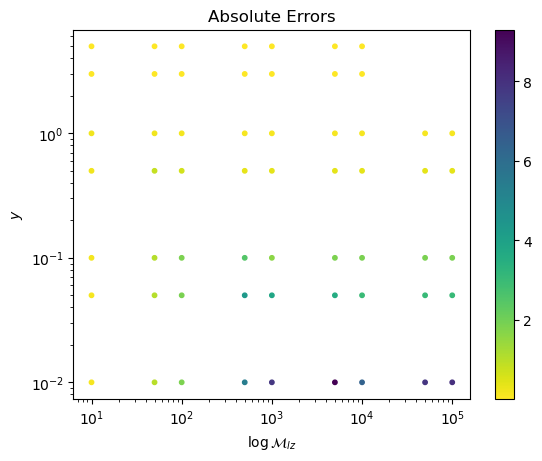

In [399]:
import matplotlib.pyplot as plt

map = plt.cm.get_cmap('viridis')
reversed_map= map.reversed(map) 
plot = plt.scatter(samples[:, 0], samples[:, 1], c=abs_err, cmap=reversed_map,  s=10)
plt.xlabel(r'$\log \mathcal{M}_{lz}$')
plt.ylabel(r'$y$')
plt.xscale('log')
plt.yscale('log')
# ticks_list = []
cbar = plt.colorbar(plot)
# cbar.set_ticklabels(list(map(str, ticks_list)))
plt.title('Absolute Errors')
plt.savefig('Abs_Errors in eta.png',dpi=300, bbox_inches='tight')
plt.show()